#### Importing the Required Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('mo_final.xlsx')
df.head()

,Electrodes,SC,Cycles
0,1D-RuO2/C,671.00,5000.0
1,3D-MnO2,370.00,5000.0
2,60-MnO2,337.00,1000.0
3,Al2O3,968.00,5000.0
4,Bi2O3,574.64,2250.0


#### Making the Input for clustering and scaling the values

In [3]:
df_new = df.drop(['Electrodes'], axis='columns') # dropping the "Electrodes" column
# df_new

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df_new)
#X

#### Using the dendogram method to find the optimal number of clusters

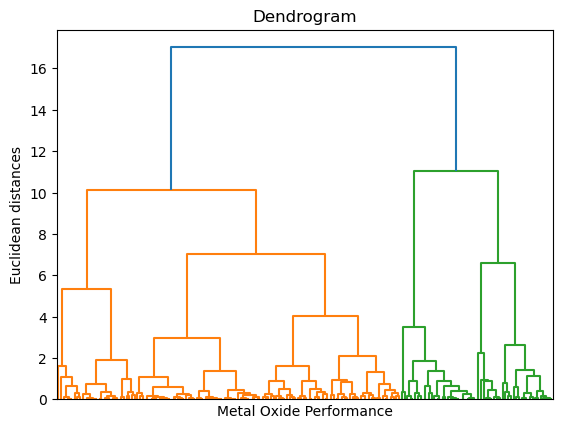

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Metal Oxide Performance')
plt.ylabel('Euclidean distances')
plt.xticks([])
plt.savefig("dendo1.png", format="png", dpi=1200, pad_inches=0.1,)
plt.show()

#### Deciding the number of clusters from dendogram and applying hierarchical clustering

In [53]:
k = 8

In [54]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
labels = hc.labels_

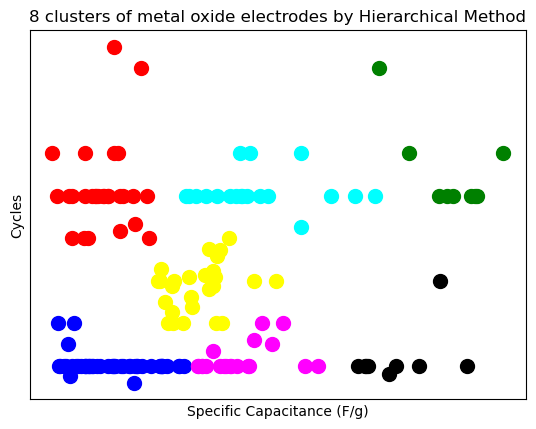

In [55]:
# Get unique cluster labels
unique_labels = set(y_hc)

# Define a list of colors for plotting
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black']

# Plot each cluster with a unique color
for label, color in zip(unique_labels, colors):
    plt.scatter(X[y_hc == label, 0], X[y_hc == label, 1], s=100, c=color, label=f'Cluster {label}')

plt.title(f'{k} clusters of metal oxide electrodes by Hierarchical Method')
plt.xlabel('Specific Capacitance (F/g)')
plt.ylabel('Cycles')

# Hide ticks and tick labels
plt.xticks([])
plt.yticks([])
plt.tick_params(axis='both', which='both', length=0)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.savefig(f"k_hc_{k}.png", format="png", dpi=1200, pad_inches=0.1,)
plt.show()

#### Labeling each cluster points with cluster number

In [56]:
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = labels
df_with_clusters

,Electrodes,SC,Cycles,Cluster
0,1D-RuO2/C,671.000000,5000.000000,3
1,3D-MnO2,370.000000,5000.000000,0
2,60-MnO2,337.000000,1000.000000,1
3,Al2O3,968.000000,5000.000000,3
4,Bi2O3,574.640000,2250.000000,5
...,...,...,...,...
177,γ-Fe2O3 NH,1800.060000,5000.000000,2
178,γ-MnO2-PANI-CP,642.500000,5000.000000,3
179,δ-MnO2,419.266667,4333.333333,0
180,δ-MnO2 HMS,216.400000,3000.000000,7


In [57]:
gk = df_with_clusters.groupby('Cluster') # Grouping the electrode materials based on clusters

In [58]:
gk.get_group(1) # starts from 0 upto k-1

,Electrodes,SC,Cycles,Cluster
2,60-MnO2,337.00,1000.0,1
7,C-SiO2,247.00,1000.0,1
9,CGS-MnO2,236.00,1000.0,1
10,CNF-20ZrO2,140.00,1000.0,1
15,Co-MnO2,161.00,1000.0,1
17,Co3O4 NWAS,525.50,1000.0,1
27,CoO-C,187.00,1000.0,1
30,CoOx,450.00,1000.0,1
31,CoPc-TiO2,401.50,1000.0,1
35,Cu2O-Cu1.8S,200.00,1000.0,1


#### Performance Evaluation of Clustering

In [59]:
from sklearn.metrics import silhouette_score

silhouette_score_2 = silhouette_score(X, df_with_clusters['Cluster'])
silhouette_score_2

0.45179338069491976